# First level analysis 
Predictive coding and negativity bias

This following analysis aims to test the following hypothesis:

        **Examination of the brain activity patterns of participants undergoing fMRI while they view words with known valence, it is possible to accurately classify the stimuli as negative or positive based on the observed neural responses.**

In [1]:
#Load libraries 
# !pip install nilearn
import os 
import nilearn 
import numpy as np

In [2]:
#Define function to list files in directory 
def list_files(startpath):
    """ Simple function to show directory tree. 
    From: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python. """
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print('{}{}'.format(subindent, f))

In [3]:
data_dir = '485667/BIDS/'

list_files(data_dir)

/
    .DS_Store
    ._.DS_Store
    .bidsignore
    README
    Untitled.ipynb
    dataset_description.json
    participants.json
    participants.tsv
.ipynb_checkpoints/
    Untitled-checkpoint.ipynb
    untitled-checkpoint.py
code/
    bidscoin/
        bidscoiner.errors
        bidscoiner.log
        bidsmap.yaml
        bidsmapper.errors
        bidsmapper.log
derivatives/
    ._sub-0058.html
    dataset_description.json
    dataset_description2023.json
    sub-0057.html
    sub-0058.html
    sub-0059.html
    sub-0060.html
    sub-0062.html
    sub-0064.html
    sub-0065.html
    sub-0066.html
    sub-0077.html
    sub-0097.html
    sub-0098.html
    sub-0099.html
    sub-0100.html
    sub-0101.html
    sub-0103.html
    sub-0104.html
    sub-0105.html
    sub-0106.html
    sub-0107.html
    .ipynb_checkpoints/
        sub-0057-checkpoint.html
        sub-0059-checkpoint.html
        sub-0060-checkpoint.html
        sub-0064-checkpoint.html
        sub-0099-checkpoint.html
        

In [186]:
import nibabel as nib

fmri_file = os.path.join(data_dir, 'derivatives/sub-0101/func/sub-0101_task-EPIsequencewords_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz') 
f_img = nib.load(fmri_file) 
print(f_img.shape) 
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())


(78, 92, 65, 610)
(2.526, 2.526, 3.0, 1.0)
('mm', 'sec')


In [5]:
#from nilearn.glm.first_level import first_level_from_bids
from first_level import first_level_from_bids #Import function from local script ("first_level.py") - I had to download the developmental version (0.9.3.dev) of the function to get the "sub_labels=" argument option

from datetime import datetime

start = datetime.now() #Only for measuring the time it takes 
print('Starting cell:',start.strftime("%H:%M:%S"))

data_dir = '485667/BIDS/'
task_label = 'EPIsequencewords'

#Define model objects for all 2022 subjects (which were not slice-time corrected during preprocessing)
models1, models_run_imgs1, models_events1, models_confounds1 = \
    first_level_from_bids(
        data_dir, task_label, 
        #minimize_memory=False,
        slice_time_ref=0.5, #Not used in 2022 data, but used in 2023 data 
        img_filters=[('desc', 'preproc')])
models1 = models1[0:9] #Subset only the first 9 subjects (those run without slice-time correction) 
models_run_imgs1 = models_run_imgs1[0:9]
models_events1 = models_events1[0:9]
models_confounds1 = models_confounds1[0:9]

#Deifne model objects for all 2023 subjects (which were slice-time corrected during preprocessing) 
models2, models_run_imgs2, models_events2, models_confounds2 = \
    first_level_from_bids(
        data_dir, task_label,
        #minimize_memory=False,
        slice_time_ref=0.5, #Not used in 2022 data, but used in 2023 data 
        img_filters=[('desc', 'preproc')])
models2 = models2[9:19] #Subset the 10 last subjects (those run with slice-time correction) 
models_run_imgs2 = models_run_imgs2[9:19]
models_events2 = models_events2[9:19]
models_confounds2 = models_confounds2[9:19]


#Combine in one list 
models = models1 + models2 
models_run_imgs = models_run_imgs1 + models_run_imgs2
models_events = models_events1 + models_events2
models_confounds = models_confounds1 + models_confounds2

print(len(models))

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 14:32:24


C:\Users\Sabrima Zaki Hansen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\interfaces\bids\query.py:46: UserWarning: 'StartTime' not found in file 485667\BIDS\derivatives\sub-0057\func\sub-0057_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json.
  warn(f"'{field}' not found in file {json_files[0]}.")
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:930: UserWarning: 'slice_time_ref' not provided and cannot be inferred from metadata.It will be assumed that the slice timing reference is 0.0 percent of the repetition time. If it is not the case it will need to be set manually in the generated list of models.
  warn("'slice_time_ref' not provided "
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:942: UserWarning: 'slice_time_ref' provided (0.5) is different from the value found in the BIDS dataset (0.0).
Note this may lead to the wrong mo

19
Finishing cell: 14:32:36


In [6]:
print(models[0])
print(models[1])
print(models[2])
print(models[3])
print(models[4])
print(models[5])
print(models[6])
print(models[7])
print(models[8])
print(models[9])
print(models[10])
print(models[11])
print(models[12])
print(models[13])
print(models[14])
print(models[15])
print(models[16])
print(models[17])
print(models[18])

FirstLevelModel(slice_time_ref=0.5, subject_label='0059', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0097', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0064', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0062', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0107', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0099', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0065', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0058', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0103', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0057', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0104', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0101', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0066', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0098', t_r=1)
FirstLevelModel(slice_time_ref=0.5, subject_label='0060', t_r=1)
FirstLevelModel(slice_tim

In [7]:
print(models[0])

FirstLevelModel(slice_time_ref=0.5, subject_label='0059', t_r=1)


In [8]:
#Print the data from the first participant as sanity check
print(models_run_imgs[0])

['485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-5_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '485667\\BIDS\\derivatives\\sub-0059\\func\\sub-0059_task-EPIsequencewords_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


In [9]:
#What does the `first_level_from_bid` function take as arguments?
import inspect
import pandas as pd

#Get the argument from the function
args=inspect.getfullargspec(first_level_from_bids)

#Make a dataframe to display arguments (skip the first two ('dataset_path' and 'task_label') that have no defaults
df = pd.DataFrame(args.defaults,args.args[2:])
print(df)

                                        0
space_label                          None
sub_labels                           None
img_filters                          None
t_r                                  None
slice_time_ref                        0.0
hrf_model                          glover
drift_model                        cosine
high_pass                            0.01
drift_order                             1
fir_delays                            [0]
min_onset                             -24
mask_img                             None
target_affine                        None
target_shape                         None
smoothing_fwhm                       None
memory              Memory(location=None)
memory_level                            1
standardize                         False
signal_scaling                          0
noise_model                           ar1
verbose                                 0
n_jobs                                  1
minimize_memory                   

In [10]:
#Print model confounds for first participant, first run
print(models_confounds[0][0].columns)
print(models_confounds[0][0])

Index(['global_signal', 'global_signal_derivative1',
       'global_signal_derivative1_power2', 'global_signal_power2', 'csf',
       'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       ...
       'rot_x_power2', 'rot_x_derivative1_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_power2',
       'rot_z_derivative1_power2'],
      dtype='object', length=428)
     global_signal  global_signal_derivative1  \
0      4736.163279                        NaN   
1      4721.439202                 -14.724077   
2      4718.874026                  -2.565175   
3      4724.153728                   5.279702   
4      4729.558853                   5.405125   
..             ...                        ...   
605    4728.839142                   2.718289   
606    4733.585230                   4.746088   
607    4733.758307                   0.173077   


In [11]:
#Subset confounds objects 
models_confounds_old = models_confounds

confounds_to_keep = ['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z', 'global_signal', 'csf','white_matter']

# Subset confounds with selection
for ii in range(len(models_confounds)): #for each subject 
    confounds1=models_confounds[ii][:].copy()
    for i in range(len(confounds1)): #for each run
        confounds2=confounds1[i].copy()
        confounds2=confounds2[confounds_to_keep]
        #Removing NAs in the first row.
        confounds2.loc[0,:]=confounds2.loc[1,:]
        confounds1[i]=confounds2
    models_confounds[ii][:]=confounds1


#Print new confounds, for first participant, first run
print(models_confounds[0][0].columns)
print(models_confounds[0][0])


Index(['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
       'global_signal', 'csf', 'white_matter'],
      dtype='object')
      trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  \
0    0.017677 -0.033063 -0.025486  0.000788 -0.000168  0.000000   
1    0.017677 -0.033063 -0.025486  0.000788 -0.000168  0.000000   
2    0.016256 -0.023736 -0.006857  0.000410 -0.000138 -0.000147   
3    0.009722  0.007596  0.025348 -0.000145 -0.000138  0.000000   
4    0.016257 -0.020915 -0.031428  0.001207 -0.000138  0.000000   
..        ...       ...       ...       ...       ...       ...   
605  0.099431  0.006604 -0.146367  0.003138  0.000728  0.000876   
606  0.098940  0.039482 -0.119794  0.002980  0.000554  0.000959   
607  0.099658  0.054738 -0.119741  0.002492  0.000765  0.001022   
608  0.101194  0.008721 -0.145790  0.002879  0.000752  0.001022   
609  0.097883  0.027413 -0.129137  0.002392  0.000809  0.001020   

     global_signal          csf  white_matter  
0      472

In [12]:
# inspecting the events
print(models_events[0][0])

          onset  duration trial_type  response_time       word response  \
0      7.291221  0.681157  image_pos       0.865084    hamster        b   
1     17.286968  0.685869  image_neg       0.753123  alligator        y   
2     27.288249  0.685010  image_neg       0.802187     lonely        y   
3     34.688185  0.685421  image_neg       0.752625  commander        y   
4     47.288150  0.686092  image_neg       0.703332       jury        y   
..          ...       ...        ...            ...        ...      ...   
115  550.999590  0.697491   word_neg       0.652223      bribe        y   
116  561.000267  0.697274   word_neg       0.618699   hospital        y   
117  571.000748  0.697226   word_neu       0.801934      truck        b   
118  581.000843  0.697610   word_pos       0.535294       sled        b   
119  591.001733  0.697226   word_neu       0.601969    spatula        y   

     correct_resp  gender  age  sub  ses  block  year  month  day  hour  \
0               1  femal

In [13]:
#Print model confounds for first participant, first run
print(models_events[0][0].columns)

events_sub= ['onset','duration','trial_type']

# Subset confounds with selection
for ii in range(len(models_events)):
    events1=models_events[ii][:]
    for i in range(len(events1)):
        events2=events1[i]
        events2=events2[events_sub]
        events1[i]=events2
    models_events[ii][:]=events1


#Print new confounds, for first participant, first run
print(models_events[0][0].columns)

Index(['onset', 'duration', 'trial_type', 'response_time', 'word', 'response',
       'correct_resp', 'gender', 'age', 'sub', 'ses', 'block', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')
Index(['onset', 'duration', 'trial_type'], dtype='object')


In [14]:
print(models_events[0][0]['trial_type'].value_counts())

image_neg    32
image_pos    28
word_neu     20
word_neg     20
word_pos     20
Name: trial_type, dtype: int64


# First level model estimation

In [15]:
# Get data and model info for 1st participant
model1=models[0]
imgs1=models_run_imgs[0]
events1=models_events[0]
confounds1=models_confounds[0]

#Fit the model
model1.fit(imgs1,events1,confounds1)

c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


FirstLevelModel(slice_time_ref=0.5, subject_label='0059', t_r=1)

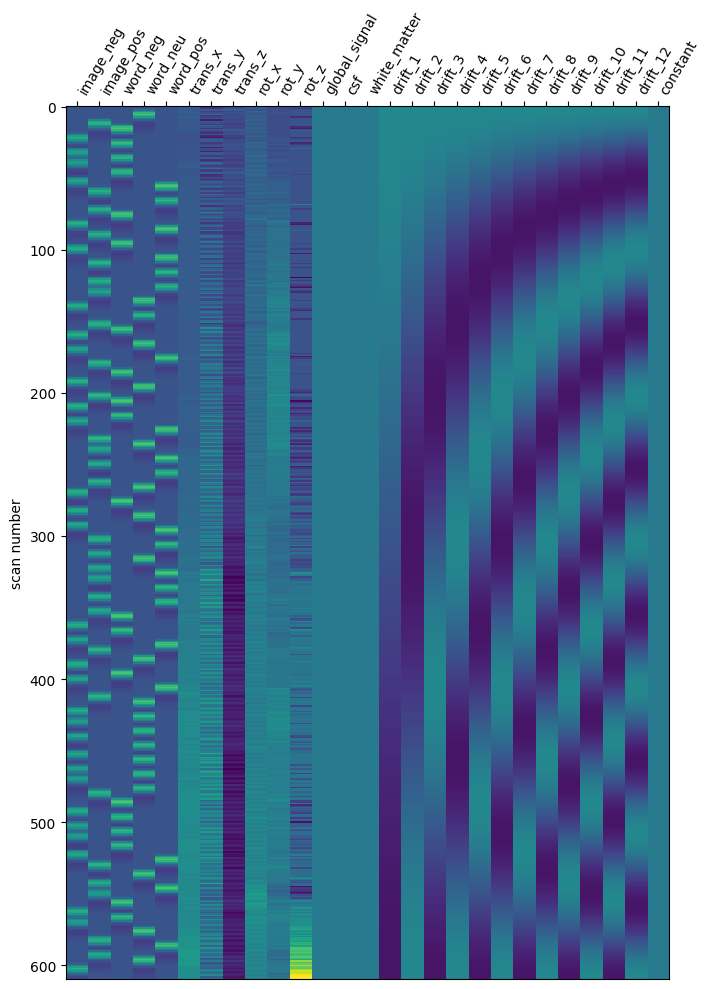

In [16]:
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt


# View the design matrix
des_matrix1 = model1.design_matrices_[0]


#Plot the design matrix
plot_design_matrix(des_matrix1)
plt.show()

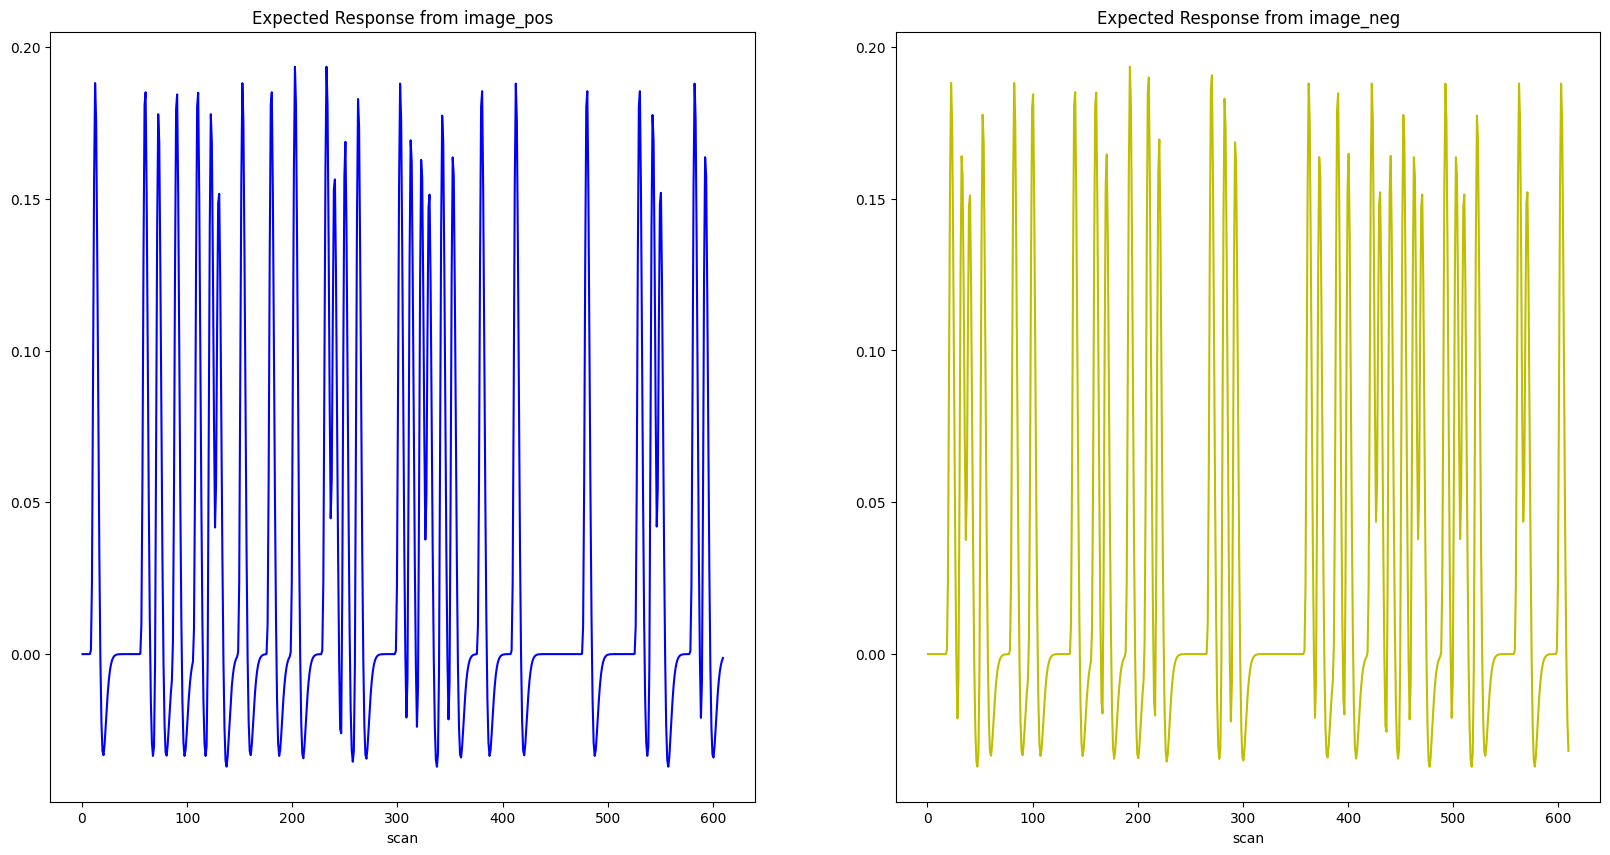

In [17]:
plt.rcParams["figure.figsize"] = [20,10]

#Plot expected signal timeseries for ocndition "image_pos"
plt.subplot(1,2,1)
plt.plot(des_matrix1['image_pos'], 'b')
plt.xlabel('scan')
plt.title('Expected Response from image_pos')

#Plot expected signal timeseries for ocndition "image_neg"
plt.subplot(1,2,2)
plt.plot(des_matrix1['image_neg'], 'y')
plt.xlabel('scan')
plt.title('Expected Response from image_neg')


plt.show()


# Defining contrasts

In [18]:
des_matrix1.columns

Index(['image_neg', 'image_pos', 'word_neg', 'word_neu', 'word_pos', 'trans_x',
       'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf',
       'white_matter', 'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5',
       'drift_6', 'drift_7', 'drift_8', 'drift_9', 'drift_10', 'drift_11',
       'drift_12', 'constant'],
      dtype='object')

<AxesSubplot: label='conditions'>

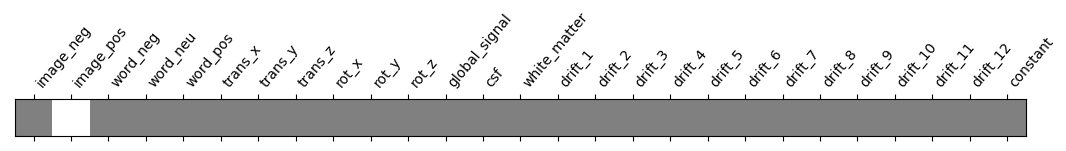

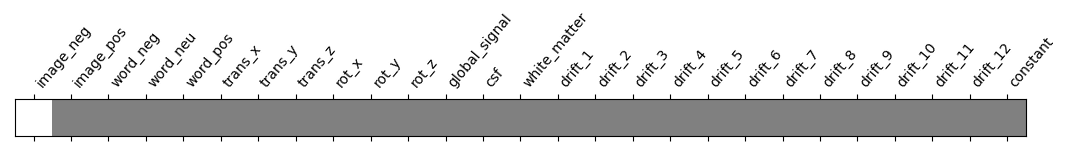

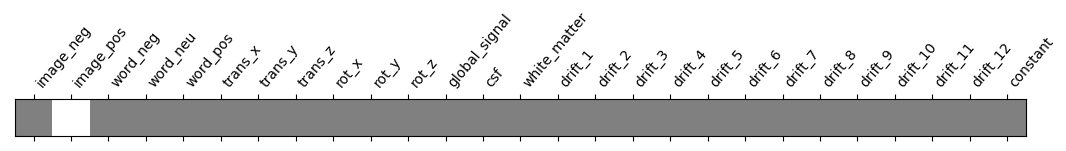

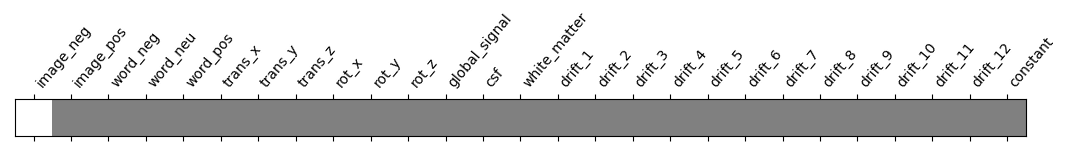

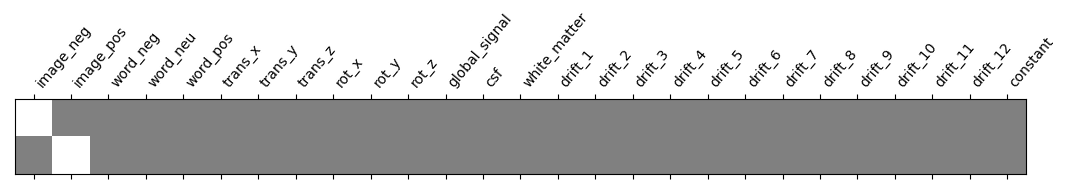

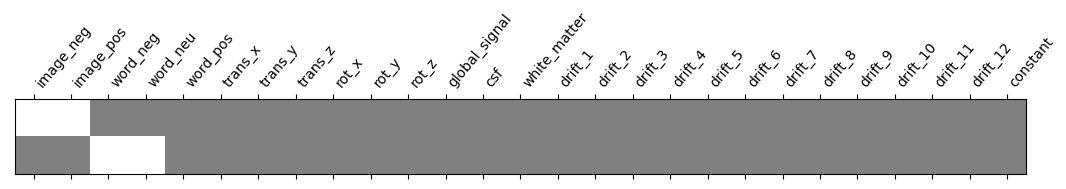

In [201]:
from nilearn.plotting import plot_contrast_matrix

#Define contrasts
#contrasts=['image_pos','image_neg','image_pos+image_neg','image_neg-image_pos']

#Define T-contrasts
contrasts=['image_pos','image_neg']


# Plot them to see what they look like
for contrast in contrasts:
    plot_contrast_matrix(contrast, des_matrix1)
    
#Define F-contrasts 
F_contrast = [np.repeat(0,des_matrix1.shape[1]), np.repeat(0,des_matrix1.shape[1])]
F_contrast[0][0] = 1
F_contrast[1][1] = 1

F_contrast2 = [np.repeat(0,des_matrix1.shape[1]), np.repeat(0,des_matrix1.shape[1])]
F_contrast2[0][0:2] = 1
F_contrast2[1][2:4] = 1

# Plot them to see what they look like
for contrast in contrasts:
    plot_contrast_matrix(contrast, design_matrix=des_matrix1)
plot_contrast_matrix(F_contrast, des_matrix1)
plot_contrast_matrix(F_contrast2, des_matrix1)

### Setting the significance threshold


In [202]:
from scipy.stats import norm
p001_unc = norm.isf(0.001)

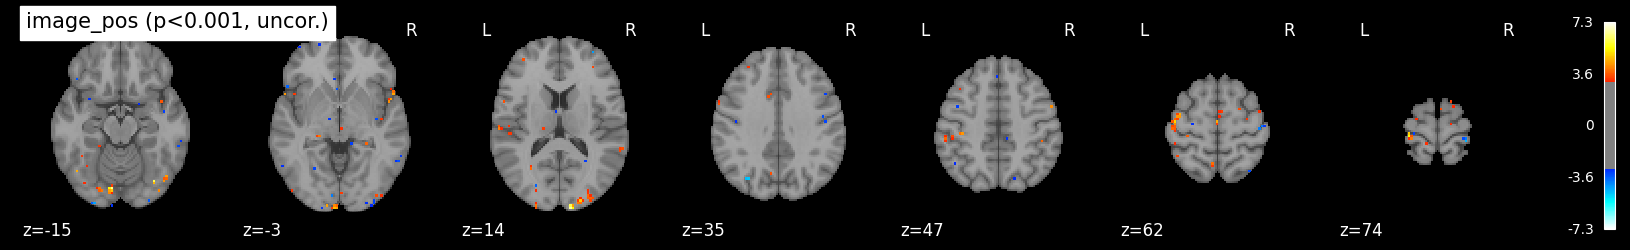

  Cluster ID          X           Y     Z  Peak Stat Cluster Size (mm3)
0          1  12.118001 -102.188000  14.5   6.626307                631
1         1a  22.222001  -97.136000  20.5   4.970897                   
2          2  37.378001  -92.084000   5.5   5.000393                382
3         2a  29.800001  -89.558000  14.5   3.804774                   
4          3 -43.454000  -13.777999  62.5   4.967010                650
5         3a -43.454000  -21.355999  65.5   4.812904                   
6         3b -35.875999   -6.199999  65.5   4.561873                   


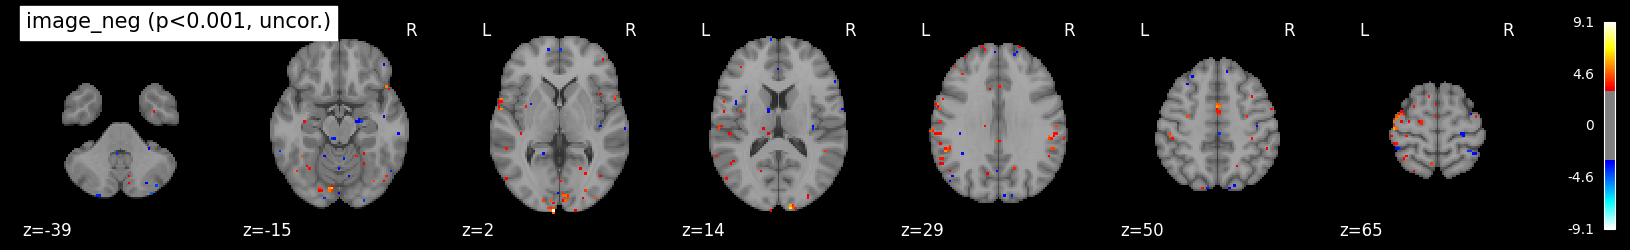

  Cluster ID          X           Y     Z  Peak Stat Cluster Size (mm3)
0          1  -5.563999 -104.714000   2.5   9.103337                497
1         1a  -3.037999  -94.610000  -6.5   4.208688                   
2          2 -38.401999   -8.725999  65.5   5.020479                440
3         2a -28.297999   -3.673999  71.5   4.729857                   


In [203]:
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table

for contrast in contrasts:
    z_map = model1.compute_contrast(contrast, output_type='z_score')

    titlex=''.join([contrast, ' ', '(p<0.001, uncor.)'])
    plot_stat_map(z_map, threshold=p001_unc,
              display_mode='z',  black_bg=True,
              title=titlex)
    plt.show()
    
    # Make a table of cluster coordinates.
    table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
    print(table)

In [204]:
#from nilearn.reporting import make_glm_report

#from nilearn.reporting import make_glm_report
from glm_reporter import make_glm_report #Again, loading the function stored locally - had to fix a bug in _make_headings() function 

#Generate a report
report = make_glm_report(model=model1,
                         contrasts=contrasts,
                         threshold=p001_unc,
                         )
#Display report in HTML format
report

C:\Users\Sabrima Zaki Hansen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\plotting\html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '


drift_model,cosine
drift_order,1
fir_delays,[0]
high_pass (Hz),0.01
hrf_model,glover
noise_model,ar1
scaling_axis,0
signal_scaling,0
slice_time_ref,0.5
smoothing_fwhm,None
standardize,False


# First level analysis of all subjects

In [207]:
models

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]

Starting cell: 15:17:45


c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
c:\Users\Sabrima Zaki Hansen\Desktop\CogNeuro\DATA\first_level.py:58: UserWarning: Mean values of 0 observed.The data have probably 

Finishing cell: 16:06:27


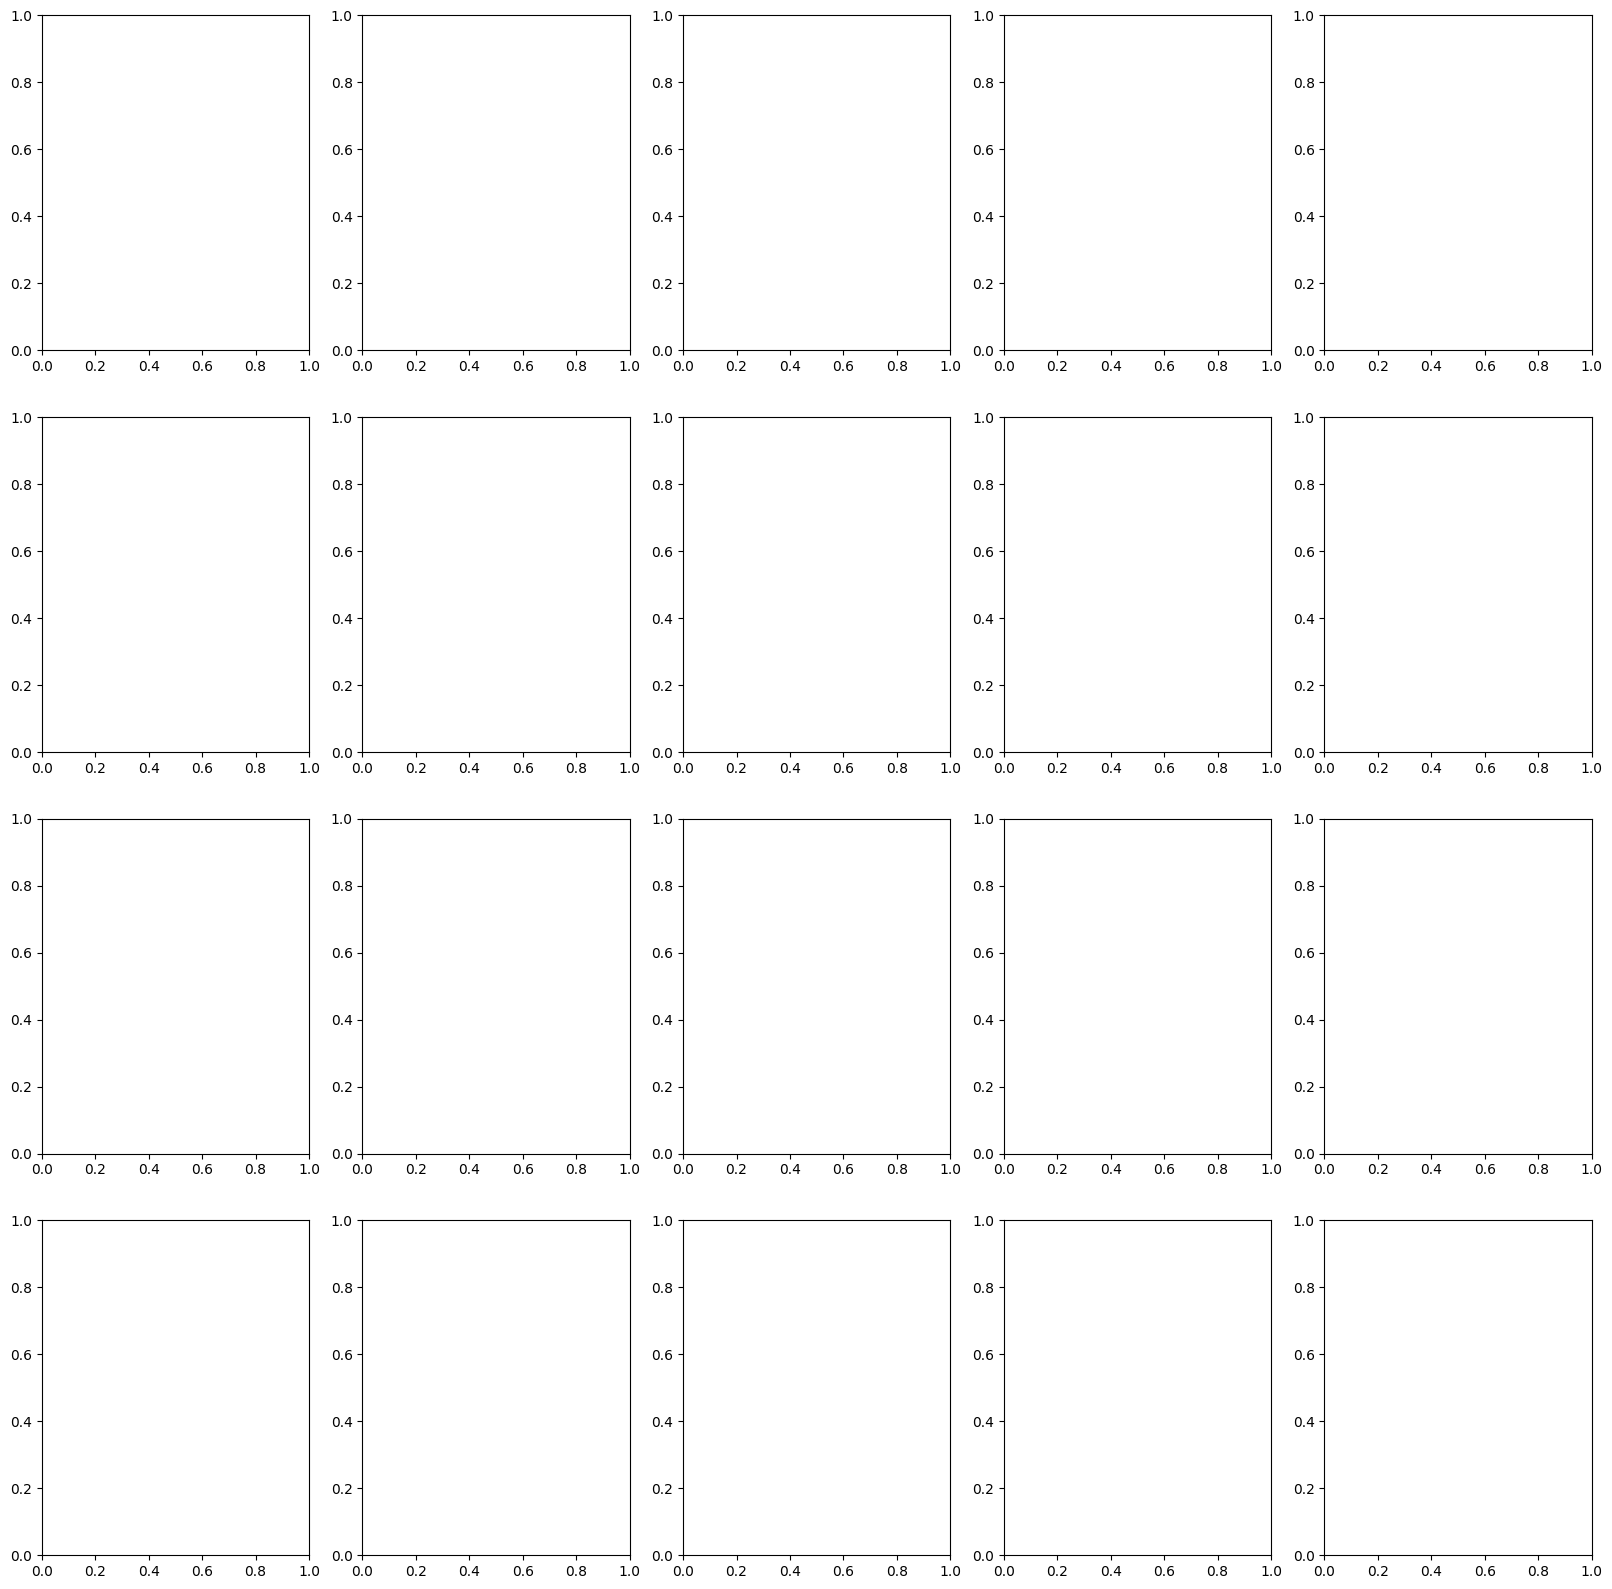

In [34]:
from nilearn import plotting
#from nilearn.glm.first_level import FirstLevelModel
import matplotlib.pyplot as plt

from nilearn.image import index_img

start = datetime.now()
print('Starting cell:',start.strftime("%H:%M:%S"))

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM, recall that the model variable is a FirstLevelModel object
    model.zmap = []
    model.conditions = []
    model.session = []
    
    for session in range(6):
        model.fit(imgs[session], events[session], confounds[session])
        # compute the contrast of interest and make a map of z-values
        for condition in ['image_pos','image_neg']:
            model.zmap.append(model.compute_contrast(condition, output_type='z_score'))
            model.conditions.append(condition)
            model.session.append(session)
    #Plot each thresholded analysis
    # plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
    #                           title=('sub-' + model.subject_label),
    #                           axes=axes[int(m_idx / 5), int(m_idx % 5)],
    #                           plot_abs=False, display_mode='x')

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [192]:
plotting.plot_glass_brain(model.zmap)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a list of 3D images (4D). See https://nilearn.github.io/stable/manipulating_images/input_output.html.

In [ ]:
models[9].zmap

In [ ]:
from nilearn.decoding import Decoder
from sklearn.model_selection import KFold

accuracy = []

decoder = Decoder(
    estimator="svc",
    standardize=False,
    screening_percentile=5,
    cv=KFold(n_splits=3),
)

for glm in models:
    decoder.fit(glm.zmap, glm.conditions,groups=glm.zmap)
    classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
    chance_level = 1.0 / len(np.unique(models[0].conditions))
    accuracy.append(classification_accuracy)


C:\Users\Sabrima Zaki Hansen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   16    25    41   147   174   178   185   188   197   583   613   659
  1093  1114  1257  1601  1999  2363  2813  2896  3056  3276  3721  3887
  4376  4873  4892  5396  6069  6962  7493  7687  8857  9048  9049 10385
 10904 12702 12858 12882 13405 13494 13638 14512 14599 14619 15484 15521
 15558 15594 15629 16084 17498 17537 17575 17683 17996 18150 18497 18801
 21492 22176 22714 22860 22881 23903 24710 26106 26953 27189 27990 28340
 28553 28694 29395 30635 31467 32386 34814 35313 35568 36388 37625 37843
 39930 40053 40081 40110 42175 42515 42902 44282 44343 44893 45042 46069
 46278 46375 46991 47014 48393 49112 49158 49180 49200 50983 52564 52993
 53049 53078 54770 55351 57219 57254 57255 57289 57564 59591 59742 61833
 61865 62187 64030 64032 64502 64575 64

: 

: 

In [ ]:
models[0].session

In [208]:
#np.mean(accuracy)
accuracy

[0.9166666666666666,
 1.0,
 1.0,
 1.0,
 0.5833333333333334,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.9166666666666666,
 1.0,
 0.9166666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [64]:
mask_anat = "485667/BIDS/sub-0107/anat/sub-0107_acq-T1sequence_run-1_T1w.nii.gz"

C:\Users\Sabrima Zaki Hansen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Sabrima Zaki Hansen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\plotting\html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



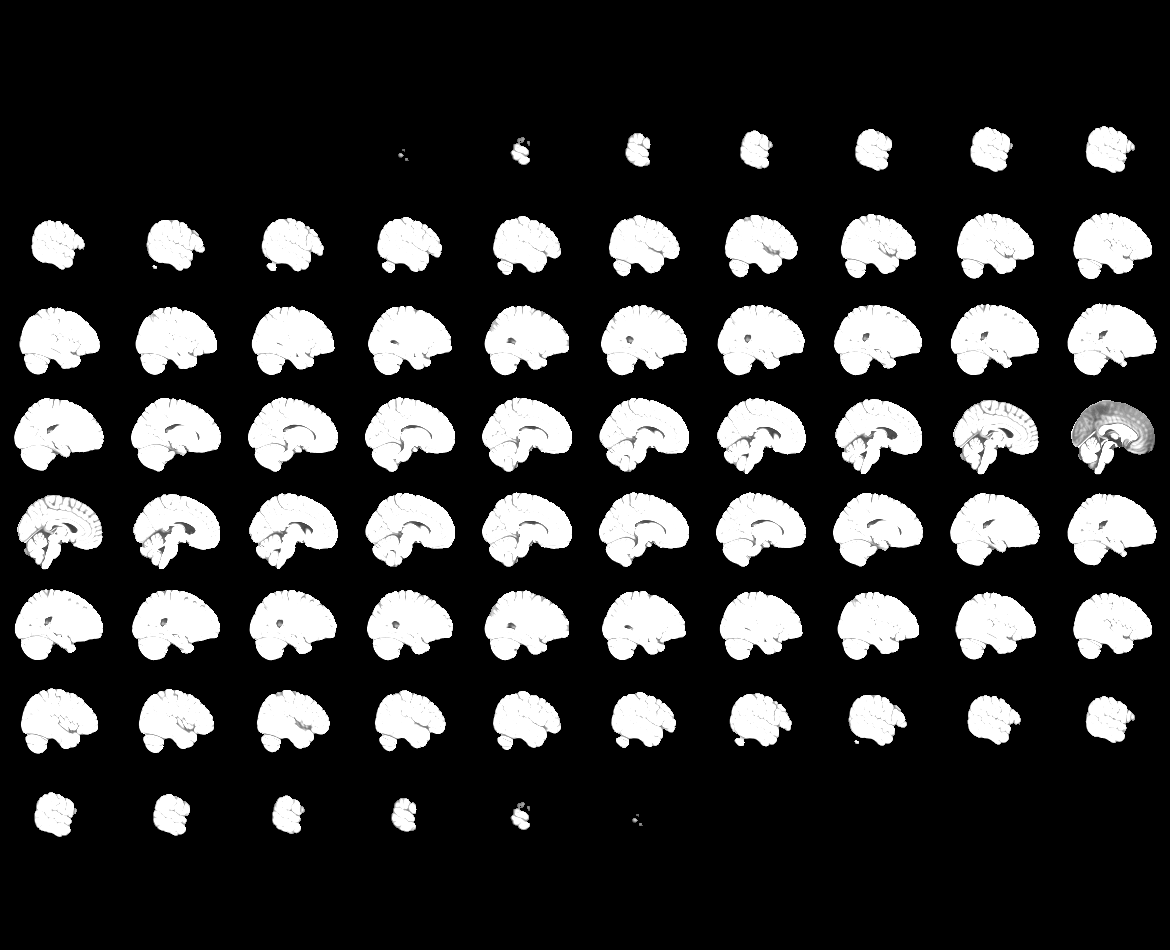
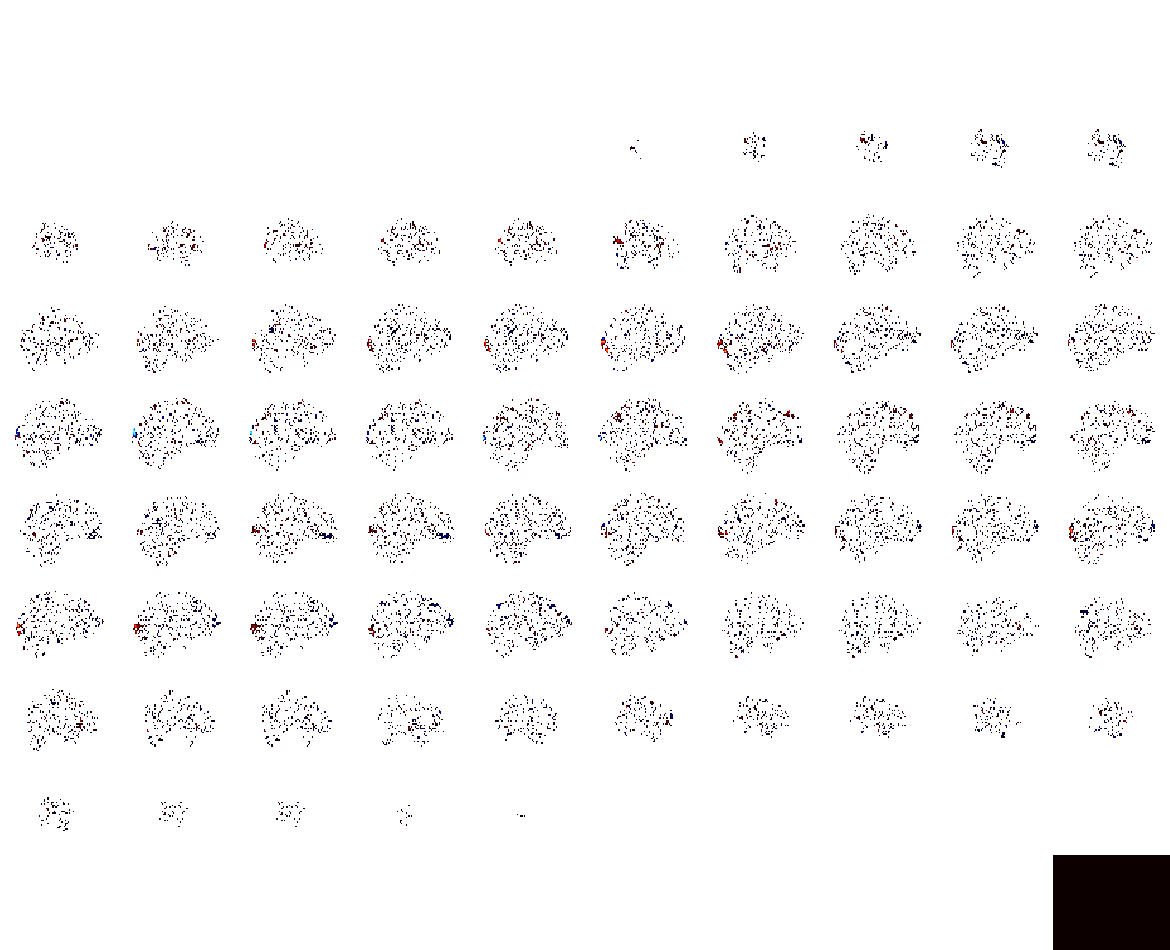

In [196]:
plotting.view_img(
    decoder.coef_img_["image_pos"],
    #bg_img = mask_anat,
    title="SVM weights for image pos",
    dim=-1,
)

In [47]:
import pickle

#Save the first level models

# Saving the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models.pkl', 'wb')
#f = open('/Users/au553087/Library/CloudStorage/OneDrive-Aarhusuniversitet/CogNeuro2023/BIDS_FaceWord_2022/fl_models.pkl','wb')
f = open('485667/BIDS/wetried.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()